# The main objective is to train a predictive model which allows the company to maximize the profit of the next marketing campaign
# The objective is to predict who will respond to an offer for a product or service
______________________________________________________________  ________
# Cleaning and transforming data with Pandas 
# Plotting with matplotlib and seaborn


# importing numpy and pandas

In [1]:
import numpy as np

In [2]:
import pandas  as pd

In [3]:
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

# reading the csv file 

In [4]:
camp= pd.read_csv(r'C:\Users\godwi\OneDrive\SQL Datasets\PostgresSQL\Marketing Campaign\marketing_campaign_data.csv',index_col= 'ID')

In [5]:
camp.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [6]:
# validate the number of rows and columns
camp.shape  

(2240, 28)

# Checking the dataframe's date type to determine further transformation 

In [7]:
print(camp.info() ) # check our datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

# Slicing needed columns

In [8]:
camp.iloc[:, 0:19].head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
ID,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,88,546,172,88,88,3,8,10,4,7
2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,1,6,2,1,6,2,1,1,2,5
4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,49,127,111,21,42,1,8,2,10,4
6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,4,20,10,3,5,2,2,0,4,6
5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,43,118,46,27,15,5,5,3,6,5


# Determine the age of the customers by creating a new column . Current year is 2022

In [9]:
# Create a new column called 'age'
camp['age'] = 2022- camp.Year_Birth

In [10]:
camp.age.to_frame().head()

,age
ID,
5524,65
2174,68
4141,57
6182,38
5324,41


In [11]:
camp.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,88,...,0,0,0,0,0,0,3,11,1,65
2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,1,...,0,0,0,0,0,0,3,11,0,68
4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,49,...,0,0,0,0,0,0,3,11,0,57
6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,4,...,0,0,0,0,0,0,3,11,0,38
5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,43,...,0,0,0,0,0,0,3,11,0,41


# Group customers by Marital Status == > couple or not couple

In [12]:
# First check unique marital status and count
camp_ms = camp.Marital_Status.value_counts()
camp_ms.to_frame().reset_index()

,index,Marital_Status
0,Married,864
1,Together,580
2,Single,480
3,Divorced,232
4,Widow,77
5,Alone,3
6,Absurd,2
7,YOLO,2


# Using matplotlip to create a bar chart of marital status

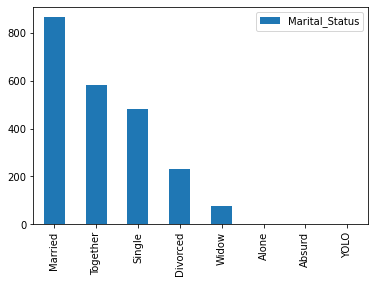

In [13]:
# plot using matplotlip
camp_ms.to_frame().plot(kind= 'bar' , figsize = (6,4));

#  Using seaborn to create a bar chart of marital status

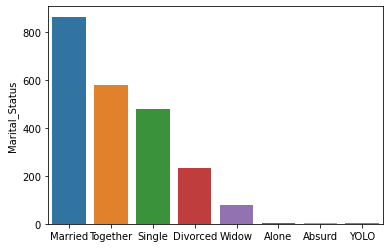

In [14]:
# plot using seaborn to show marital status
sns.barplot(data =camp_ms.to_frame(), y =camp_ms.to_frame().Marital_Status, \
            x = camp_ms.to_frame().index );

# Creating the new column to show ==> couple or not

In [15]:
camp['is_couple'] = ['couple' if i in (['Married','Together']) else 'not_couple' for i in camp.Marital_Status]

In [16]:
camp.is_couple.value_counts().to_frame()

,is_couple
couple,1444
not_couple,796


# Bar chart to show distribution

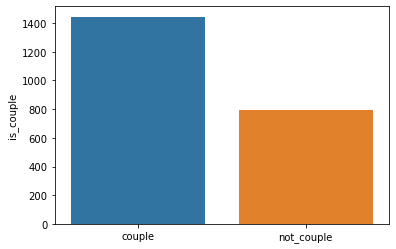

In [17]:
sns.barplot(data = camp.is_couple.value_counts().to_frame() ,\
y =camp.is_couple.value_counts().to_frame().is_couple, x= camp.is_couple.value_counts().to_frame().index );

# Group customers by the number of kids (kidhome + teenhome)

In [18]:
# Create a new column called 'no_of_kids'
camp['no_of_kids'] = camp.Kidhome + camp.Teenhome 

In [19]:
camp.loc[:, ['age','Kidhome','Teenhome', 'no_of_kids']].head()

,age,Kidhome,Teenhome,no_of_kids
ID,,,,
5524,65,0,0,0
2174,68,1,1,2
4141,57,0,0,0
6182,38,1,0,1
5324,41,1,0,1


# Has Children 'yes or no'  ==> create a new column using list comprehension

In [20]:
camp['have_children'] = [ 'yes' if  i > 0 else 'no' for i in camp.no_of_kids ]
camp.have_children

ID
5524      no
2174     yes
4141      no
6182     yes
5324     yes
        ... 
10870    yes
4001     yes
7270      no
8235     yes
9405     yes
Name: have_children, Length: 2240, dtype: object

# Total amount spend by customer across products

In [21]:

camp['spend'] = camp.MntWines + camp.MntFruits\
+ camp.MntMeatProducts + camp.MntFishProducts + camp.MntSweetProducts + camp.MntGoldProds

In [22]:
camp.loc[:, ['age','Kidhome','Teenhome', 'no_of_kids', 'have_children','spend']].head()

,age,Kidhome,Teenhome,no_of_kids,have_children,spend
ID,,,,,,
5524,65,0,0,0,no,1617
2174,68,1,1,2,yes,27
4141,57,0,0,0,no,776
6182,38,1,0,1,yes,53
5324,41,1,0,1,yes,422


In [23]:
# has children Bar chart
camp_hk = camp.have_children.value_counts().to_frame()
camp_hk

,have_children
yes,1602
no,638


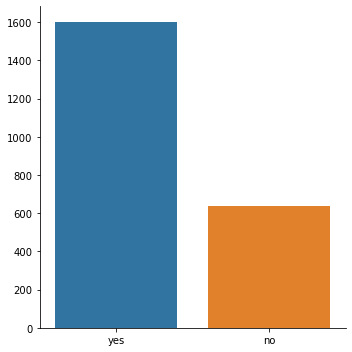

In [24]:
sns.catplot(data= camp_hk , x =camp_hk.have_children.index ,\
y = camp_hk.have_children.values, kind = 'bar');

# Find the relationship between age and total spend

In [25]:
camp1 = camp.loc[:, ['age','Kidhome','Teenhome', 'no_of_kids', 'have_children','spend']]
camp1.set_index('age').head()

,Kidhome,Teenhome,no_of_kids,have_children,spend
age,,,,,
65,0,0,0,no,1617
68,1,1,2,yes,27
57,0,0,0,no,776
38,1,0,1,yes,53
41,1,0,1,yes,422


In [26]:
asd = camp1.set_index('age')['spend'].to_frame().reset_index()
asd

,age,spend
0,65,1617
1,68,27
2,57,776
3,38,53
4,41,422
...,...,...
2235,55,1341
2236,76,444
2237,41,1241
2238,66,843


In [77]:
asdg = asd.groupby('age').sum().reset_index()
asdg.head()

,age,spend
0,26,138
1,27,3806
2,28,4372
3,29,5956
4,30,8912


In [87]:
round(asdg.spend.corr(asdg.age),3)
# Finding is that age and amount spent is less correlated, no relationship

-0.195

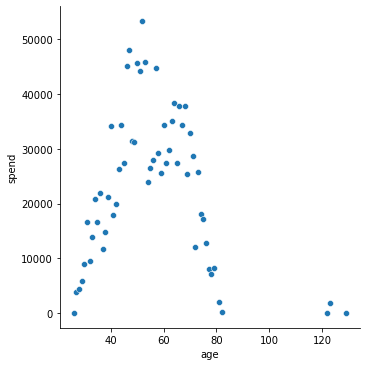

In [85]:
sns.relplot (data = asdg , x =asdg.age ,y =asdg.spend)

# Find the relationship between number children and total spend

In [49]:
nks = camp1.loc[:, ['no_of_kids', 'spend']].reset_index()
nks.head()

,ID,no_of_kids,spend
0,5524,0,1617
1,2174,2,27
2,4141,0,776
3,6182,1,53
4,5324,1,422


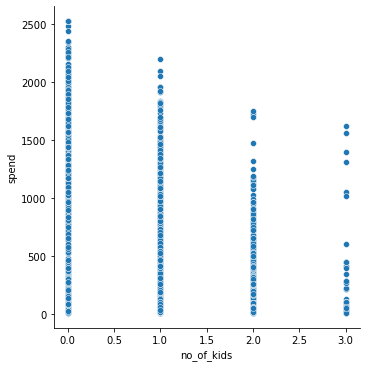

In [45]:
sns.relplot( data = nks , y = 'spend', x = 'no_of_kids');

In [48]:
nks.spend.corr(nks.no_of_kids)
# no correlation between number of kids and spend

-0.49888764868089897

In [88]:
camp.age.value_counts().head()

46    89
51    87
47    83
50    79
44    77
Name: age, dtype: int64